# Four Factors

Para comenzar con este script, primero hay que aclarar que se van a calcular ocho factores.  
Esto se debe al procedimiento de cálculo de victorias: primero se estima la puntuación de cada partido, y luego se compara con el del rival. Debido a esto, hace falta "predecir" la puntuación del rival y, con lo cual, calcular sus four factors primero.

In [1]:
# Primero se importan las librerías
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# A continuación se cargan los datos
wdir = os.path.dirname(os.path.realpath('__file__'))
data = pd.read_csv(wdir+'/fourFactors.csv')

# Comprobamos que los datos son correctos
data.head(10)

,efg,efg_opp,ftr,ftr_opp,orb,orb_opp,scr,scr_opp,tov,tov_opp,won
0,0.525000,0.500000,0.739130,0.923077,0.228571,0.200000,80,74,0.146128,0.171317,1
1,0.516949,0.515873,0.600000,0.789474,0.218750,0.333333,67,80,0.136240,0.100806,0
2,0.575472,0.490909,0.761905,0.777778,0.407407,0.242424,77,68,0.138427,0.137137,1
3,0.373016,0.689394,0.785714,0.733333,0.350000,0.266667,58,102,0.206517,0.110294,0
4,0.675000,0.410448,0.812500,0.700000,0.320000,0.340426,94,69,0.129803,0.126728,1
5,0.530303,0.470588,1.000000,0.850000,0.222222,0.218750,73,65,0.129333,0.189702,1
6,0.401786,0.314286,0.708333,0.888889,0.225806,0.326531,62,60,0.203447,0.133452,1
7,0.453333,0.472727,0.846154,0.590909,0.333333,0.281250,79,65,0.100312,0.236183,1
8,0.507937,0.452830,0.785714,0.800000,0.314286,0.187500,75,64,0.103681,0.114613,1
9,0.492424,0.552632,0.866667,0.916667,0.333333,0.321429,78,85,0.141844,0.117555,0


Ahora hace falta declarar lo que son los "ejes" de la función. Se sabe que los cuatro factores tienen un peso DESCONOCIDO, un coeficiente. Por este motivo, van al eje X, y con lo cual la puntuación final va al eje Y.

In [3]:
# Primero las del equipo deseado
x = data[['efg', 'ftr', 'orb', 'tov']]
y = data['scr']

# A continuación las del equipo rival
x_opp = data[['efg_opp', 'ftr_opp', 'orb_opp', 'tov_opp']]
y_opp = data['scr_opp']

### Regresión Lineal Múltiple

Primero hace falta separar los datos, puesto que no se pueden usar todos. Se separan unos datos de entrenamiento y otros de prueba para la comprobación posterior.

In [4]:
# Se genera una semilla de aleatoriedad (la misma para el equipo deseado y el rival, para que se separen los mismos partidos)
random = 7
# Se separan los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=random)
x_train_opp, x_test_opp, y_train_opp, y_test_opp = train_test_split(x_opp, y_opp, random_state=random)

A continuación se inicia el algoritmo de regresión linear para obtener los coeficientes de cada factor.

In [5]:
# Inicio del algoritmo
estimate = LinearRegression()
estimate_opp = LinearRegression()

In [6]:
# Entrenamiento del modelo
estimate.fit(x_train, y_train)
estimate_opp.fit(x_train_opp, y_train_opp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Se muestran los coeficientes de cada factor para saber su importancia a la hora de obtener más puntos y, por consiguiente, se pueden usar para determinar la victoria.

In [7]:
estimate.coef_

array([129.33633385,   7.5309764 ,  24.56793731, -71.70886892])

El primer valor se corresponde con el eFG%, el segundo con el TOV%, el tercero con el ORB% y el último con el FTR.
Para comprobar estos coeficientes, se puede mostrar un gráfico de distribución de puntos y uno de columnas apiladas:

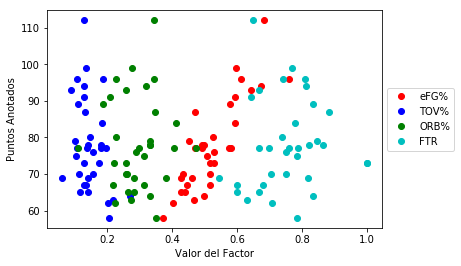

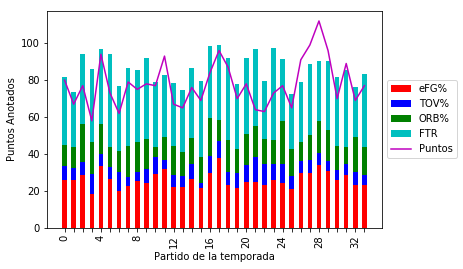

In [8]:
# PRIMER GRÁFICO
# Puntos en el gráfico
plt.plot(x['efg'], y, 'ro', label='eFG%')
plt.plot(x['tov'], y, 'bo', label='TOV%')
plt.plot(x['orb'], y, 'go', label='ORB%')
plt.plot(x['ftr'], y, 'co', label='FTR')
# Información del gráfico
plt.xlabel('Valor del Factor')
plt.ylabel('Puntos Anotados')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Mostrar el gráfico
plt.show()

# SEGUNDO GRÁFICO
# Elementos del gráfico
header = ['eFG%','TOV%','ORB%','FTR', 'Score']
# Se convierten los factores de float64 a listas (y se multiplica por 50 para que sean visibles con la línea)
efg_values = []
for i in x['efg']: efg_values.append(i*50)
tov_values = []
for i in x['tov']: tov_values.append(i*50)
orb_values = []
for i in x['orb']: orb_values.append(i*50)
ftr_values = []
for i in x['ftr']: ftr_values.append(i*50)
dataset= [efg_values, tov_values, orb_values, ftr_values]
# Se genera el eje X
X_AXIS = []
for i in range(0, len(efg_values)):
    if i%4==0 or i==0 or i==(len(efg_values)):
        X_AXIS.append(i)
        continue
    X_AXIS.append('')
# Configuraciones del gráfico
configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.5
# Se ponen los elementos en el gráfico
p1 = plt.bar(ind, dataset[0], width, color='r')
p2 = plt.bar(ind, dataset[1], width, bottom=dataset[0], color='b')
p3 = plt.bar(ind, dataset[2], width, bottom=np.array(dataset[0])+np.array(dataset[1]), color='g')
p4 = plt.bar(ind, dataset[3], width, bottom=np.array(dataset[0])+np.array(dataset[1])+np.array(dataset[2]), color='c')
line = plt.plot(y, color='m')
# Se muestra la información
plt.legend((p1[0], p2[0], p3[0], p4[0], line[0]), ('eFG%','TOV%','ORB%','FTR', 'Puntos'), loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(ind, X_AXIS, rotation=90)
plt.xlabel('Partido de la temporada')
plt.ylabel('Puntos Anotados')
# Se muestra el gráfico
plt.show()

_Cuantos más puntos haya en la esquina superior derecha significa que el factor tiene más valor en el juego_

### Predicción de resultados
Como extensión de estos coeficientes, se puede tratar de predecir las victorias del equipo. Por este motivo, se usarán los datos que se dejaron fuera del entrenamiento para comprobarlo.

In [9]:
# Primero se hace una predicción de las puntuaciones del equipo deseado
y_pred = estimate.predict(x_test)
# Y se sigue con el rival
y_pred_opp = estimate.predict(x_test_opp)

In [10]:
# Debido a los formatos de NumPy al trabajar con SciKit-Learn, el tipo de variable es int64, el cual no es iterable.
# Hace falta convertirlo a una lista para poder trabajar con él.
p_results = y_pred.tolist()
p_results_opp = y_pred_opp.tolist()
results = y_test.tolist()
results_opp = y_test_opp.tolist()

In [11]:
# Se inician las variables para almacenar los resultados
p_won = []
won = []

Finalmente se hace un bucle para comparar los resultados predecidos con los reales, y así comprobar la eficacia del modelo. La variable `p_results` contiene los resultados predecidos del equipo deseado, `p_results_opp` es la puntuación del oponente, `results` es el resultado real del equipo deseado y `results_opp` es el resultado real del oponente.

In [12]:
counter = 0
while counter < len(p_results):
    p_won.append(1 if p_results[counter] > p_results_opp[counter] else 0)
    print("A-"+str(p_results[counter]) + " | B-"+str(p_results_opp[counter]))
    won.append(1 if results[counter] > results_opp[counter] else 0)
    print("A-"+str(results[counter]) + " | B-"+str(results_opp[counter]))
    counter += 1

# La primera fila es el resultado predecido para el primer partido, y la segunda es el real, y así sucesivamente
# La A significa el equipo deseado, y la B el rival

A-89.83771462978905 | B-75.05950754242018
A-77 | B-68
A-75.56489909284042 | B-79.21904271925717
A-78 | B-81
A-76.5712750410572 | B-83.21497350816567
A-67 | B-80
A-77.82077950204601 | B-87.43359385343318
A-78 | B-85
A-69.80691717709652 | B-80.50571240751786
A-65 | B-77
A-81.8914156164518 | B-68.62416027248668
A-73 | B-65
A-69.3949828998586 | B-80.35589953121975
A-64 | B-82
A-106.17078314562661 | B-78.35321413190096
A-96 | B-77
A-80.47851180035296 | B-81.24562407348503
A-70 | B-69


In [13]:
# Se muestran los resultados
print(p_won)
print(won)

[1, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 0, 1, 1]


En la fila de arriba se ecuentran los resultados predecidos y en la de abajo están los reales.
Como bien se puede apreciar, tan solo se discrepa en un sólo resultado. Y cambiando la semilla de aleatoriedad se falla o bien uno o se aciertan todos.

## Conclusión
Se puede decir que **el modelo funciona** y que los pesos obtenidos son relativamente correctos, puesto que se acierta en una gran cantidad de veces con las victorias y derrotas.